# Import

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Chargement des données

Dans le cadre de ce notebook, nous étudierons un problème de classification. 

Pour travailler, on analysera des données comprenant 10 années d'observation de la météo en Australie. On essayera de prédire, pour un lieu donné, si la pluie va tomber le lendemain. 

Plus d'informations sur les données ici : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [127]:
# Charger le fichier weatherAUS.csv dans une variable df


In [128]:
# Afficher les infos du dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [129]:
# Afficher le résumé statistique du dataset


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [130]:
# Afficher les premières lignes du dataset


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [131]:
# Afficher les dimensions du dataset


(145460, 23)

In [132]:
# Remplacer les valeurs manquantes du dataset et afficher ses nouvelles dimensions
# Créer une variable df_fill contenant le nouveau dataset

(139411, 23)

In [134]:
# Afficher les infos du nouveau dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139411 entries, 0 to 139410
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           139411 non-null  object 
 1   Location       139411 non-null  object 
 2   MinTemp        139411 non-null  float64
 3   MaxTemp        139411 non-null  float64
 4   Rainfall       139411 non-null  float64
 5   Evaporation    139411 non-null  float64
 6   Sunshine       139411 non-null  float64
 7   WindGustDir    139411 non-null  object 
 8   WindGustSpeed  139411 non-null  float64
 9   WindDir9am     139411 non-null  object 
 10  WindDir3pm     139411 non-null  object 
 11  WindSpeed9am   139411 non-null  float64
 12  WindSpeed3pm   139411 non-null  float64
 13  Humidity9am    139411 non-null  float64
 14  Humidity3pm    139411 non-null  float64
 15  Pressure9am    139411 non-null  float64
 16  Pressure3pm    139411 non-null  float64
 17  Cloud9am       139411 non-nul

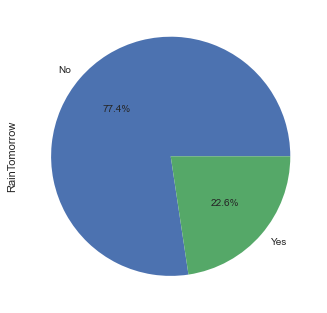

In [135]:
# Visualiser la distribution de la target 'RainTomorrow' avec une pie chart


Il est important de notifier que notre target est déséquilibrée (proportion différente entre nos deux classes).

# Preprocessing

In [141]:
# Transformer la colonne 'RainTomorrow' de manière à remplacer les No par des 0 et les Yes par des 1


In [143]:
from sklearn.model_selection import train_test_split

In [185]:
# Créer une variable X contenant les features, une variable y contenant la target


# Créer les variables X_train, X_test, y_train et y_test grâce à train_test_split()
# On voudra un jeu de test d'une taille de 20% et on pourra définir l'argument random_state=0



In [149]:
y_test.value_counts()

0    21675
1     6208
Name: RainTomorrow, dtype: int64

On peut voir à nouveau que notre target est déséquilibrée. 

In [144]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

In [145]:
# Créer une fonction create_model() qui renvoie une pipeline comportant toutes les étapes de transformation 
# des données (normalisation, encoding)
def create_model(model):


Dans le cadre de cet exercice, la target que nous essayons de prédire ne peut prendre que deux valeurs, elle est donc binaire (il pleut demain ou il ne pleut pas demain). On va alors chercher à entrainer un modèle de régression logistique qui gère bien les sorties binaires.

In [208]:
# Créer une variable model comprenant un modèle SGDClassifier avec une loss le définissant comme
# un modèle de régression logistique


In [209]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B6057E50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B6057EB0>)])),
                ('sgdclassifier', SGDClassifier(loss='log'))])

# Entrainement

In [210]:
# Entrainer le modèle sur nos données d'entrainement


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B6057E50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B6057EB0>)])),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [211]:
# Créer la variable ypred qui contient les prédictions faites sur le jeu de test


In [212]:
ypred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Evaluation

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [214]:
# Afficher l'accuracy du modèle


0.8504823727719399

Notre modèle obtient une accuracy (pourcentage de bonnes réponses données par le modèle) de 85%, ce qui semble être un très bon score. Cependant, il ne faut pas oublier que notre target est déséquilibrée (il y a dans nos données plus de cas où il ne pleut pas le lendemain que de cas où il pleut le lendemain).

Par conséquent, si notre modèle prédit pour toutes les observations qu'il ne pleut pas demain, alors il obtiendra quand même une accuracy de 77,4% (d'après la distribution de la target).

On comprend alors que dans ce cas, l'accuracy n'est pas une métrique pertinente pour évaluer les performances de notre modèle.

Pour mieux comprendre les prédictions de notre modèle, on peut dans un premier temps afficher la matrice de confusion :

In [33]:
confusion_matrix(y_test, ypred).T

array([[20281,  2816],
       [ 1394,  3392]], dtype=int64)

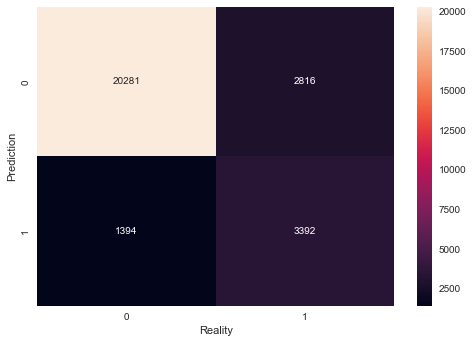

In [34]:
sns.heatmap(confusion_matrix(y_test, ypred).T, annot=True, fmt='g')
plt.xlabel('Reality')
plt.ylabel('Prediction')
plt.show()

En affichant cette matrice, il est plus facile de comprendre la nature de nos erreurs. 
- La diagonale traversant la figure du coin en haut à gauche au coin en bas à droite représente les prédictions correctement réalisées. 
- Au contraire, la diagonale partant du coin en bas à gauche jusqu'au coin en haut à droite représente nos erreurs.

On peut ainsi voir où se trouvent les difficultés de notre modèle. En effet, notre modèle fait le plus d'erreurs quand il prédit qu'il ne va pas pleuvoir demain (valeur prédite de 0) alors qu'il va bien pleuvoir demain (valeur réelle de 1).

Ainsi, notre modèle semble avoir une bonne précision mais un mauvais rappel, voyons cela en détail :

In [217]:
# Calculer la precision du modèle


0.7192944719294472

In [218]:
# Calculer le rappel (recall) du modèle


0.538659793814433

In [219]:
# Calculer le score f1, qui est un mixte de la précision et du rappel
# C'est un score pratique pour comparer rapidement les performances globales de deux modèles


0.6160081053698075

Comme on peut l'observer, notre modèle a bel et bien une précision plus élevée que son rappel. Cela signifie que :

- Lorsque notre modèle prédit qu'il va pleuvoir demain, il fait peu d'erreurs.
- Notre modèle ne repère qu'une faible quantité des cas où il va pleuvoir demain.

Ainsi, on pourra faire relativement confiance à notre modèle quand il prédit qu'il va pleuvoir, mais il ne nous alertera peu souvent et laissera passer de nombreux cas où il va pleuvoir.

Rappel et précision sont indissociables, une augmentation de l'un fait baisser l'autre et vice versa. C'est la raison pour laquelle on parle de compromis entre la précision et le rappel.

Ce compromis s'orientera différement en fonction de nos cas d'usage. Par exemple, si notre modèle doit nous alerter en cas de fraude bancaire, on préférera que le modèle nous prévienne souvent (rappel élevé) même si il y a souvent de fausses alertes (précision faible). A nous d'utiliser ce compromis à notre avantage.


## Courbes Précision et Rappel & ROC

Afin de mieux visualiser ce compromis, on peut tracer la courbe de la précision VS le rappel.

In [220]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [221]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ypred)

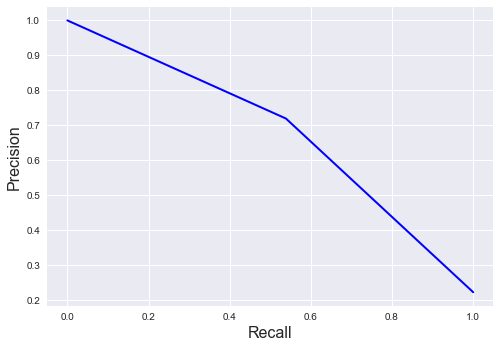

In [222]:
# Tracer la courbe précision contre rappel


Plus la précision est haute et plus le rappel est bas (et vice versa). 

Il est intéressant de calculer l'aire sous la courbe que l'on vient de tracer, car un modèle parfait (précision et rappel de 100%) donnerait une courbe qui se rapproche le plus possible du coin supérieur droit du graphique. Ainsi, plus le modèle est bon, plus l'aire sous la courbe est grande. 

On va maintenant s'intéresser à la courbe ROC qui est très similaire. Elle compare le rappel (taux de vrais positifs) avec ce qu'on appelle parfois le fall-out (taux de faux positifs).

In [223]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

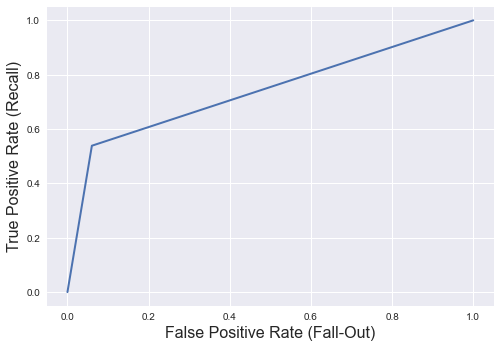

In [224]:
plt.plot(fpr, tpr, linewidth=2)                               
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.show()

De la même manière, il existe un compromis entre recall et fall-out.

- 

In [225]:
roc_auc_score(y_test, ypred)

0.7392260906788427

## Entrainer un second modèle et comparer ses performances avec le précédent

In [330]:
for loss in SGDClassifier.loss_functions.keys():
    print(loss)

hinge
squared_hinge
perceptron
log
modified_huber
squared_error
squared_loss
huber
epsilon_insensitive
squared_epsilon_insensitive


In [325]:
model2 = create_model(SGDClassifier(loss='hinge')) # Linear SVM

In [326]:
model2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B9A742E0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A5B9A74F40>)])),
                ('sgdclassifier', SGDClassifier())])

In [327]:
ypred2 = model2.predict(X_test)

In [332]:
print(f"{'Accuracy score :':<19}" + f" Regression Logistique : {accuracy_score(y_test, ypred):.0%}, SVM : {accuracy_score(y_test, ypred2):.0%}")
print(f"{'Precision score :':<19}" + f" Regression Logistique : {precision_score(y_test, ypred):.0%}, SVM : {precision_score(y_test, ypred2):.0%}")
print(f"{'Recall score : ':<19}" + f" Regression Logistique : {recall_score(y_test, ypred):.0%}, SVM : {recall_score(y_test, ypred2):.0%}")
print(f"{'F1 score :':<19}" + f" Regression Logistique : {f1_score(y_test, ypred):.0%}, SVM : {f1_score(y_test, ypred2):.0%}")
print(f"{'ROC AUC score :':<19}" + f" Regression Logistique : {roc_auc_score(y_test, ypred):.0%}, SVM : {roc_auc_score(y_test, ypred2):.0%}")


Accuracy score :    Regression Logistique : 85%, SVM : 85%
Precision score :   Regression Logistique : 72%, SVM : 78%
Recall score :      Regression Logistique : 54%, SVM : 45%
F1 score :          Regression Logistique : 62%, SVM : 57%
ROC AUC score :     Regression Logistique : 74%, SVM : 71%


In [333]:
precisions2, recalls2, thresholds2 = precision_recall_curve(y_test, ypred2)

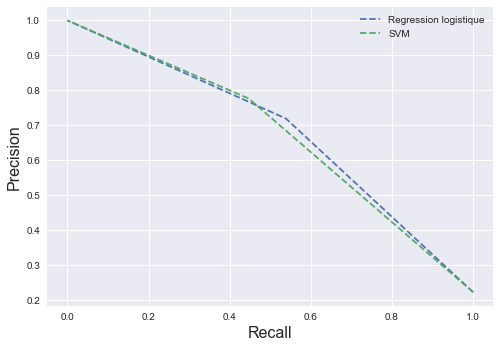

In [350]:
plt.plot(recalls, precisions, ls='--', label='Regression logistique')
plt.plot(recalls2, precisions2, ls='--', label='SVM')
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.legend()
plt.show()

In [337]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, ypred2)

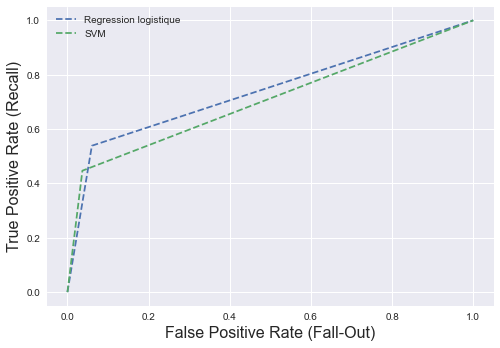

In [348]:
plt.plot(fpr, tpr, ls='--', label='Regression logistique')    
plt.plot(fpr2, tpr2, ls='--', label='SVM')                               
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.legend()
plt.show()